## Models to Predict Bicycle production using Linear Regressions

### By Samuel

In [55]:
import requests
import lxml.html as lh
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

In [57]:
# Code cell 3
from sklearn.metrics import r2_score
from scipy.optimize import curve_fit

In [58]:
internet_data = 'https://www.worldometers.info/bicycles/' #assign the wiki page
#WHO_url = 'https://data.humdata.org/dataset/novel-coronavirus-2019-ncov-cases'

page = requests.get(internet_data) # create a handle to for contents of the wiki page
# page
doc = lh.fromstring(page.content) # store content of the wiki page under doc

# doc.xpath('//tr')[3].text_content()

tr_elements = doc.xpath('//tr') # parse data stored between tr in the html

[len(T) for T in tr_elements[:12]] # check the length of the first 12 row

[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]

check the head table

In [59]:
tr_elements = doc.xpath('//tr') # parse first row as header

col = [] # create empty list
i = 0

for t in tr_elements[0]: # for each row, store each first element (header) and an empty list
    
#     print(t.text_content())
    i+=1
    name=t.text_content()
    print (f'{i}:{name}')
#     print("%d:%s" % (i,name))
    col.append((name,[]))


1:Country 
2:Quantity
3:Year


Check the data in other rows

In [60]:
for j in range(1,len(tr_elements)): # Because header is the first row, data would be store in the subsequent rows.
    T = tr_elements[j] #T is j'th row
    
    if len(T)!=3: #if row is not size 3, //tr data is not from the table.
        break
        
    i = 0 #i is the index of the first column
    
    for t in T.iterchildren(): #iterate through each element of the row
        data=t.text_content()
            
        col[i][1].append(data) #append the data to the empty list of the i'th column
            
        i+=1 #increment i for the next column

To see the No of Rows and Columns

In [61]:
[len(C) for (title,C) in col]

[25, 25, 25]

Create a dataframe and read the file

In [62]:
Dict = {title:column for (title,column) in col}
df = pd.DataFrame(Dict)

In [63]:
df = df.drop([df.index[0]])
df

,Country,Quantity,Year
1,China,"450,000,000",1992
2,USA,"100,000,000",1995
3,Japan,"72,540,000",1996
4,Germany,"62,000,000",1996
5,India,"30,800,000",1990
6,Indonesia,"22,300,000",1982
7,Italy,"23,000,000",1995
8,UK,"20,000,000",1995
9,France,"20,000,000",1995
10,Brazil,"40,000,000",1996


In [64]:
df.shape

(24, 3)

In [65]:
df.describe()

,Country,Quantity,Year
count,24,24,24
unique,24,22,8
top,Australia,"6,000,000",1995
freq,1,2,13


In [66]:
df.dtypes

Country     object
Quantity    object
Year        object
dtype: object

Convert the string to float

In [67]:
df['Quantity'] = df.Quantity.str.replace(',', '').astype(float)

In [68]:
df['Quantity'] = df.Quantity.astype(float)
df['Year'] = df.Year.astype(float)

df.head()

,Country,Quantity,Year
1,China,450000000.0,1992.0
2,USA,100000000.0,1995.0
3,Japan,72540000.0,1996.0
4,Germany,62000000.0,1996.0
5,India,30800000.0,1990.0


In [69]:
df['Year'] = df.Year.astype(int)
df['Quantity'] = df.Quantity.astype(int)

df

,Country,Quantity,Year
1,China,450000000,1992
2,USA,100000000,1995
3,Japan,72540000,1996
4,Germany,62000000,1996
5,India,30800000,1990
6,Indonesia,22300000,1982
7,Italy,23000000,1995
8,UK,20000000,1995
9,France,20000000,1995
10,Brazil,40000000,1996


In [70]:
df.describe()

,Quantity,Year
count,2.400000e+01,24.000000
mean,3.851208e+07,1993.583333
std,9.114058e+07,4.031578
min,3.000000e+06,1982.000000
25%,4.875000e+06,1994.250000
50%,8.550000e+06,1995.000000
75%,2.495000e+07,1995.000000
max,4.500000e+08,2000.000000


Step 2: Visualize the bicycle production

In [71]:
dfc =df[['Quantity','Year']]
dfc.head()

,Quantity,Year
1,450000000,1992
2,100000000,1995
3,72540000,1996
4,62000000,1996
5,30800000,1990


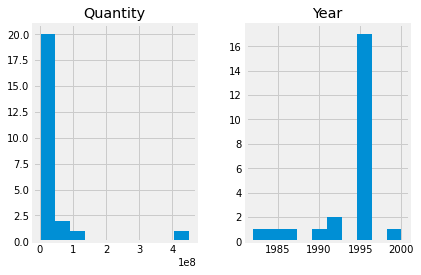

In [80]:
viz =dfc[['Quantity','Year']]
viz.hist()
plt.show()

<AxesSubplot:xlabel='Year', ylabel='Quantity'>

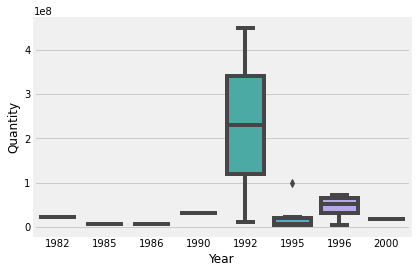

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.boxplot(x="Year", y="Quantity", data=df)

Text(0.5, 1.0, 'Bicycles sales')

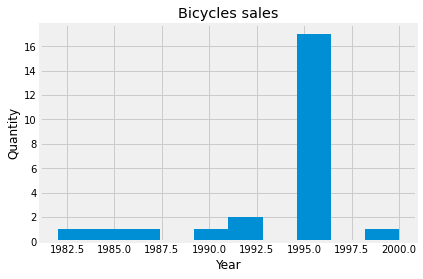

In [81]:
# Bar graph

%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["Year"])

plt.pyplot.xlabel("Year")
plt.pyplot.ylabel("Quantity")
plt.pyplot.title("Bicycles sales")

<AxesSubplot:xlabel='Year', ylabel='Quantity'>

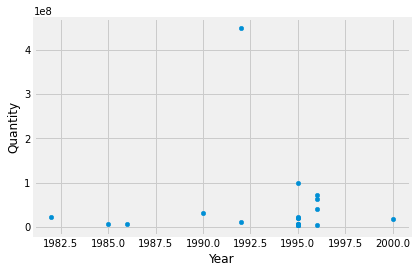

In [82]:
#scatter diagram of quantity against years


import matplotlib.pyplot as plt

df.plot.scatter(x='Year',
                      y='Quantity')

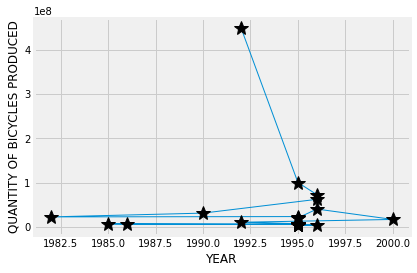

In [85]:
plt.scatter(df.Year, df.Quantity, color ='blue')
x = df.Year
y = df.Quantity
plt.plot(x, y, label =' ', linewidth = 1)
plt.plot(x, y,'*k', markersize = 14, label = '')
plt.xlabel('YEAR')
plt.ylabel('QUANTITY OF BICYCLES PRODUCED')
plt.show()

Step 1: Overlay a simple linear regression model over the Internet historical data.

In [86]:
df = dfc

The slope of line is -998036.1123526462.
The y intercept is 2028180242.9843626.
The best fit simple linear regression line is -998036.1123526462x + 2028180242.9843626.


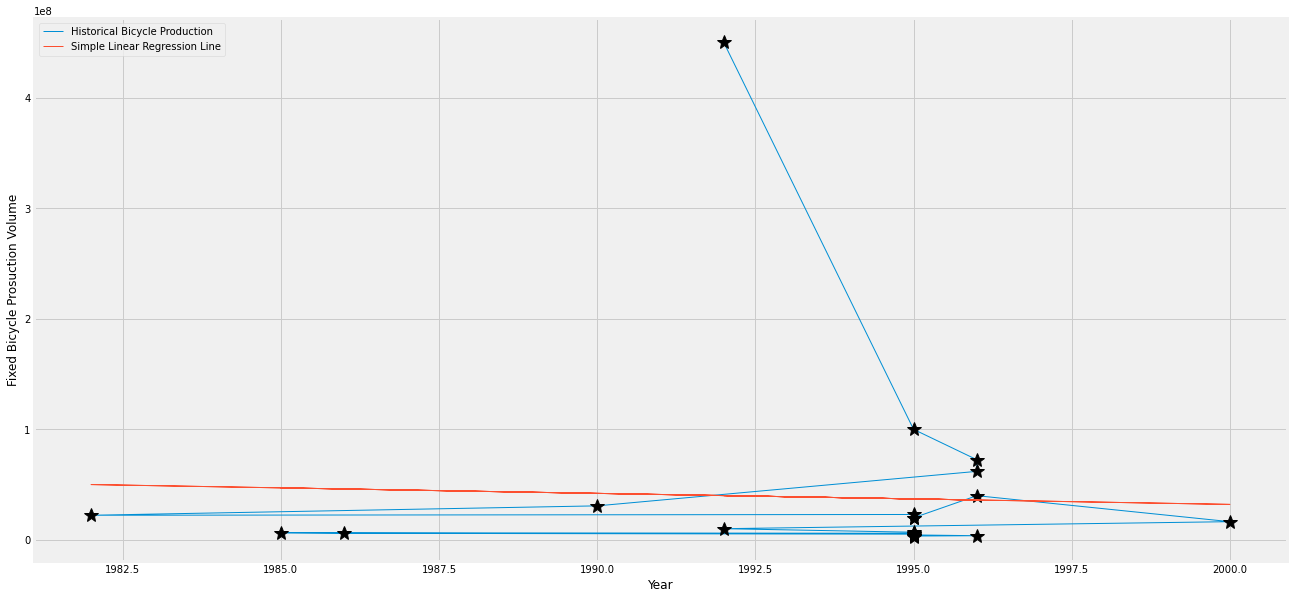

In [87]:
# Code cell 6
# Create a slightly bigger figure use all the available space
plt.figure(figsize = (20,10))

order = 1

# XY Plot of year and traffic
x = dfc.Year
y = dfc.Quantity

m, b = np.polyfit(x,y,order)

plt.plot(x, y, label = 'Historical Bicycle Production', linewidth = 1)
plt.plot(x, y,'*k', markersize = 15, label ='')
plt.plot(x, m*x + b, '-', label = 'Simple Linear Regression Line', linewidth = 1)

print ('The slope of line is {}.'.format(m))
print ('The y intercept is {}.'.format(b))
print ('The best fit simple linear regression line is {}x + {}.'.format(m,b))


#Increase sligthly the axis sizes to make the plot more clear
#plt.axis([x.iloc[0]-1, x.iloc[-1]+1, y.iloc[0]*-0.1, y.iloc[-1]*1.1])

# Add axis labels
plt.xlabel('Year')
plt.ylabel('Fixed Bicycle Prosuction Volume')
plt.legend(loc = 'upper left')


# Increase default font size
plt.rcParams.update({'font.size': 26})
plt.show()

Part 4: Linear Regression: Higher Order Polynomials

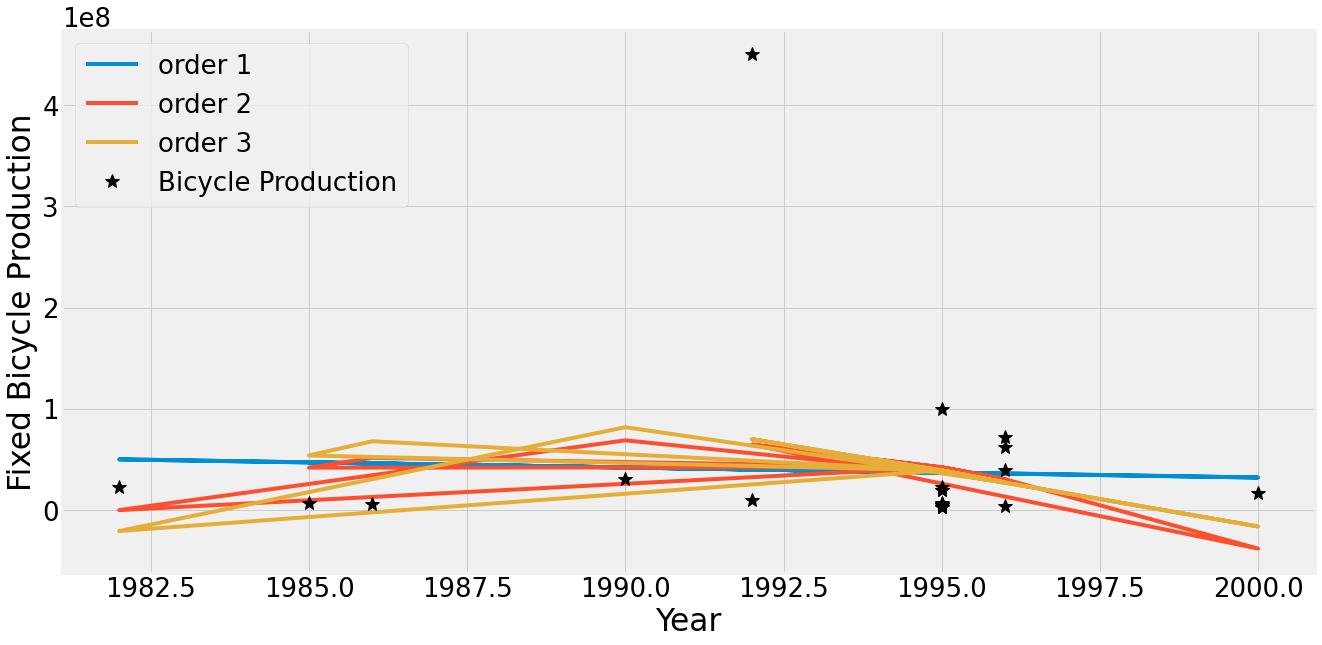

In [92]:
# Code cell 7
models = []       # to store polynomial model parameters (list of poly1d objects)
errors_hist = []  # to store the absolute errors for each point (2005-2015) and for each model (list of numpy arrays )
mse_hist = []     # to store the MSE for each model (list of numpy floats)

#Try polynomial models with increasing order
for order in range(1,4):
    # Fit polynomial model
    p = (np.poly1d(np.polyfit(x, y, order)))
    models.append(p)
    
plt.figure(figsize = (20,10))

# Visualize polynomial models fit
for model in models[0:3]:
    plt.plot(x, model(x), label = 'order ' + str(len(model)), linewidth = 4)

plt.plot(x, y, '*k', markersize = 14, label = 'Bicycle Production', linewidth = 4)
plt.legend(loc = 'upper left')

# Add axis labels
plt.xlabel('Year')
plt.ylabel('Fixed Bicycle Production')

plt.show()

Part 5: Calculating the Errors

In [89]:
# Code cell 8
# Calculate and store the erros
models = []       # to store polynomial model parameters (list of poly1d objects)
errors_hist = []  # to store the absolute errors for each point (2005-2015) and for each model (list of numpy arrays )
mse_hist = []     # to store the MSE for each model (list of numpy floats)

#Try polynomial models with increasing order
for order in range(1,4):
    # Fit polynomial model
    p = (np.poly1d(np.polyfit(x, y, order)))
    models.append(p)
    
    e = np.abs(y-p(x))        # absolute error
    mse = np.sum(e**2)/len(dfc) # mse
    
    errors_hist.append(e)   #Store the absolute errors
    mse_hist.append(mse) # Store the mse

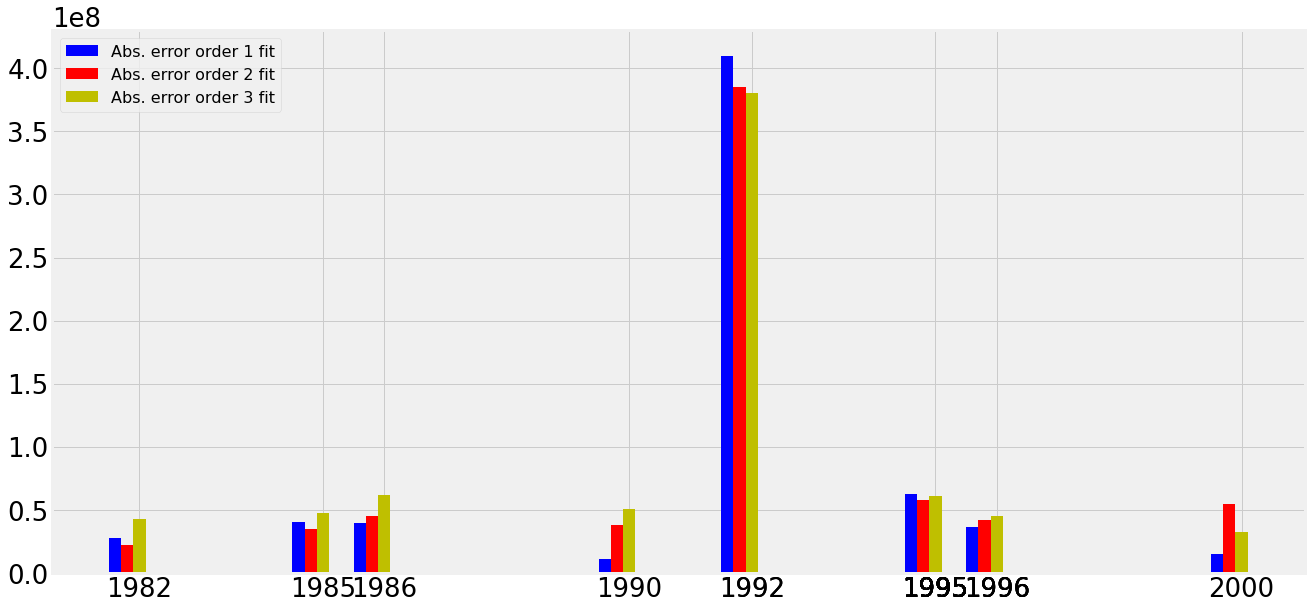

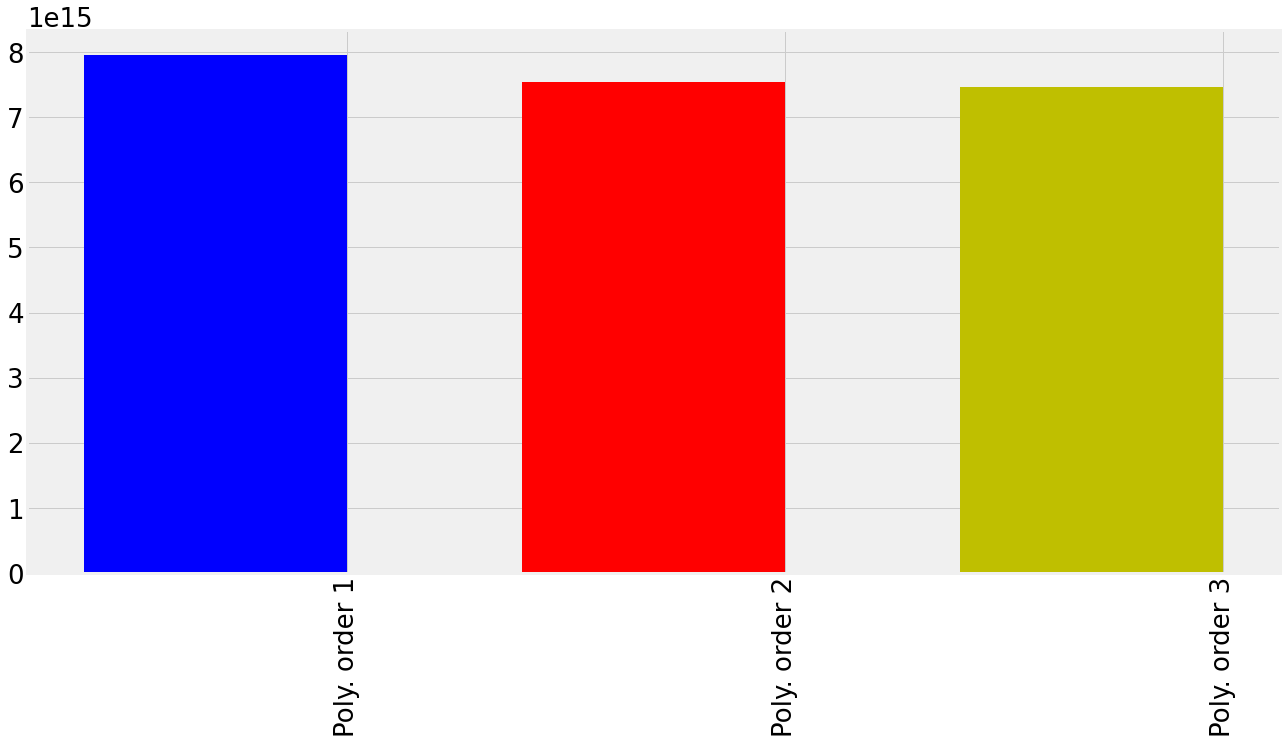

In [90]:
# Code cell 9
# Visualize fit error for each year

x = dfc.Year
width = 0.2   #size of the bar

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

p1 = ax.bar( x, errors_hist[0], width, color = 'b', label = 'Abs. error order 1 fit')
p2 = ax.bar( x + width, errors_hist[1], width, color = 'r', label = 'Abs. error order 2 fit')
p3 = ax.bar( x + 2*width, errors_hist[2], width, color = 'y', label = 'Abs. error order 3 fit')

# "Prettyfy" the bar graph
ax.set_xticks(x+2*width)
ax.set_xticklabels(x)
plt.legend(loc = 'upper left', fontsize =16)
plt.show()

#Visualise MSE for each model
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

x = np.array([0,1,2])
width = .6   #size of the bar

p1 = ax.bar( x[0], mse_hist[0], width, color = 'b', label = 'pred. error order 1 fit')
p2 = ax.bar( x[1], mse_hist[1], width, color = 'r', label = 'pred. error order 2 fit')
p3 = ax.bar( x[2], mse_hist[2], width, color = 'y', label = 'pred. error order 3 fit')

ax.set_xticks(x+width/2)
ax.set_xticklabels(['Poly. order 1', 'Poly. order 2', 'Poly. order 3'], rotation=90)
plt.show()

In [93]:
# Code cell 10
# Polynomial function order
order = 3

x = dfc.Year.values      # regressor
y = dfc.Quantity.values   # regressand

# Fit the model, return the polynomial parameter values in a numpy array such that
# y = p[0]*x**order + p[1]*x*(order-1) ...

p_array = np.polyfit(x,y,order)

print(type(p_array), p_array)

# poly1d is a convenience class, used to encapsulate “natural” operations on polynomials 
# so that said operations may take on their customary form in code

# wrap the p_array in a poly1 object
p = np.poly1d(p_array)

print(type(p), p)

# use the poly1d object to evaluate the value of the polynomial in a specific point
print('The value of the polynomial for x = 2020 is : {} '.format(p(2020)))

# compute the absolute error for each value of x and the MSE error for the estimated polynomial model
e = np.abs(y-p(x))
mse = np.sum(e**2)/len(x)

print('The estimated polynomial parameters are: {}'.format(p))
print('The errors for each value of x, given the estimated polynomial parameters are: \n {}'.format(e))
print('The MSE is :{}'.format(mse))

<class 'numpy.ndarray'> [ 7.71856509e+04 -4.62208956e+08  9.22599545e+11 -6.13848490e+14]
<class 'numpy.poly1d'>            3             2
7.719e+04 x - 4.622e+08 x + 9.226e+11 x - 6.138e+14
The value of the polynomial for x = 2020 is : 793919389.0 
The estimated polynomial parameters are:            3             2
7.719e+04 x - 4.622e+08 x + 9.226e+11 x - 6.138e+14
The errors for each value of x, given the estimated polynomial parameters are: 
 [3.80044463e+08 6.08705881e+07 4.53147892e+07 3.47747892e+07
 5.10030825e+07 4.30054488e+07 1.61294119e+07 1.91294119e+07
 1.91294119e+07 1.27747892e+07 3.26860206e+07 5.98055369e+07
 3.21794119e+07 3.31294119e+07 4.74457525e+07 6.19383820e+07
 3.39294119e+07 3.41294119e+07 3.46294119e+07 2.34252108e+07
 3.56294119e+07 3.58294119e+07 3.58794119e+07 3.61294119e+07]
The MSE is :7461799315423375.0


Part 6: Non-Linear Regression Model: Exponential Growth

In [101]:
# Code cell 11
# Non linear regression model fitting

# First, define the regression model function, in this case, we'll choose an exponential of the form y= a*(b^(x))
def my_exp_func(x, a, b):
    return a * (b ** x) 

x = np.arange(1980-2000)    # the regressor is not the year in itself, but the number of years from 2005
y = dfc.Quantity.values # regressand

# use curve_fit to find the exponential parameters vector p. cov expresses the confidence of the 
# algorithm on the estimated parameters 
p, cov = curve_fit(my_exp_func, x, y)
e = np.abs(y - my_exp_func(x, *p))
mse = np.sum(e**2)/len(dfc)

print('The estimated exponential parameters are: {}'.format(p))
print('The errors for each value of x, given the estimated exponential parameters are: \n {}'.format(e))
print('The MSE is :{}'.format(mse))

models.append(p)

errors_hist.append(e) # Store the absolute error 
mse_hist.append(mse)

ValueError: operands could not be broadcast together with shapes (0,) (24,) 

## Part 7: Comparing Models
Compare the errors and visualize the fit for the different regression models.

TypeError: my_exp_func() takes 3 positional arguments but 5 were given

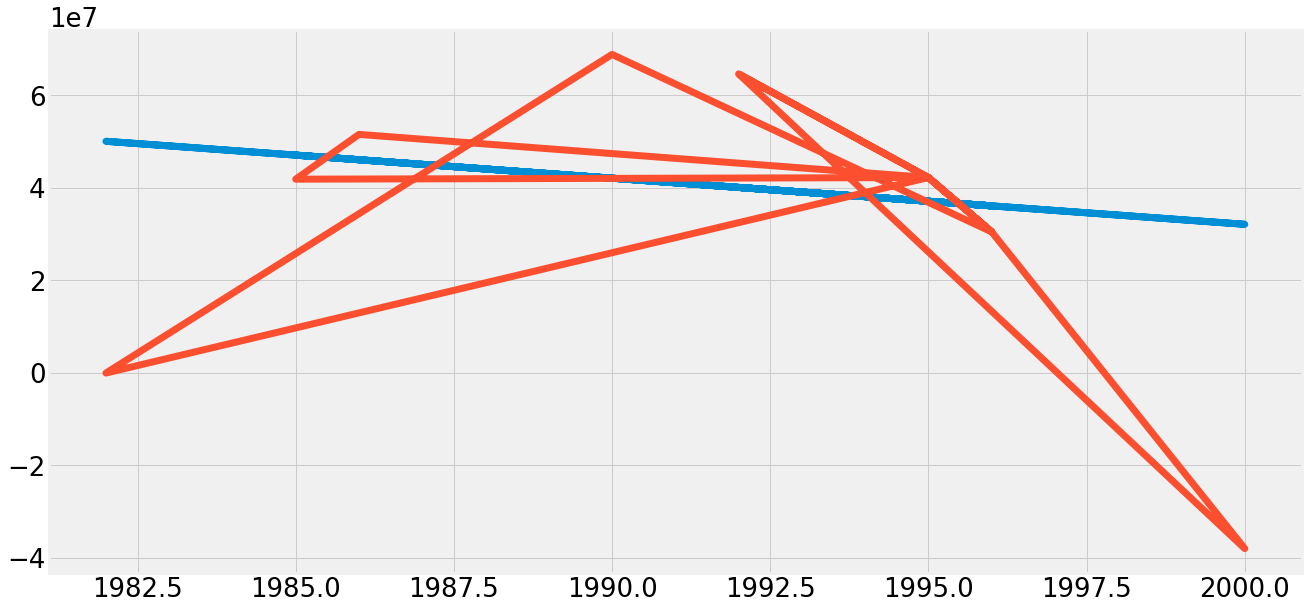

In [107]:
# Code cell 12
plt.figure(figsize = (20,10))

# Visualize polynomial models fit
for model in models[0:-1]:
    
    x = dfc.Year.values      
    y = dfc.Quantity.values   
    plt.plot(x, model(x), label = 'order ' + str(len(model)), linewidth = 7)

# Visualize exponenetial model fit
x = np.arange(1980-2000)    # the regressor is not the year in itself, but the number of years from 2005
plt.plot(dfc.Year.values, my_exp_func(x, *models[-1]), label = 'Exp. non-linear regression', linewidth = 7)

plt.plot(dfc.Year, dfc.Quantity, '*k', markersize = 14, label='Historical Internet Traffic')
plt.legend(loc = 'upper left')

# Add axis labels
plt.xlabel('Year')
plt.ylabel('Bicycle production')
plt.show()


In [108]:
dfc

,Quantity,Year
1,450000000,1992
2,100000000,1995
3,72540000,1996
4,62000000,1996
5,30800000,1990
6,22300000,1982
7,23000000,1995
8,20000000,1995
9,20000000,1995
10,40000000,1996


For the selected range of year, the difference between a 2nd or 3rd order polynomial regression model and the exponential one is negligible. Let's visualize the actual errors.

IndexError: list index out of range

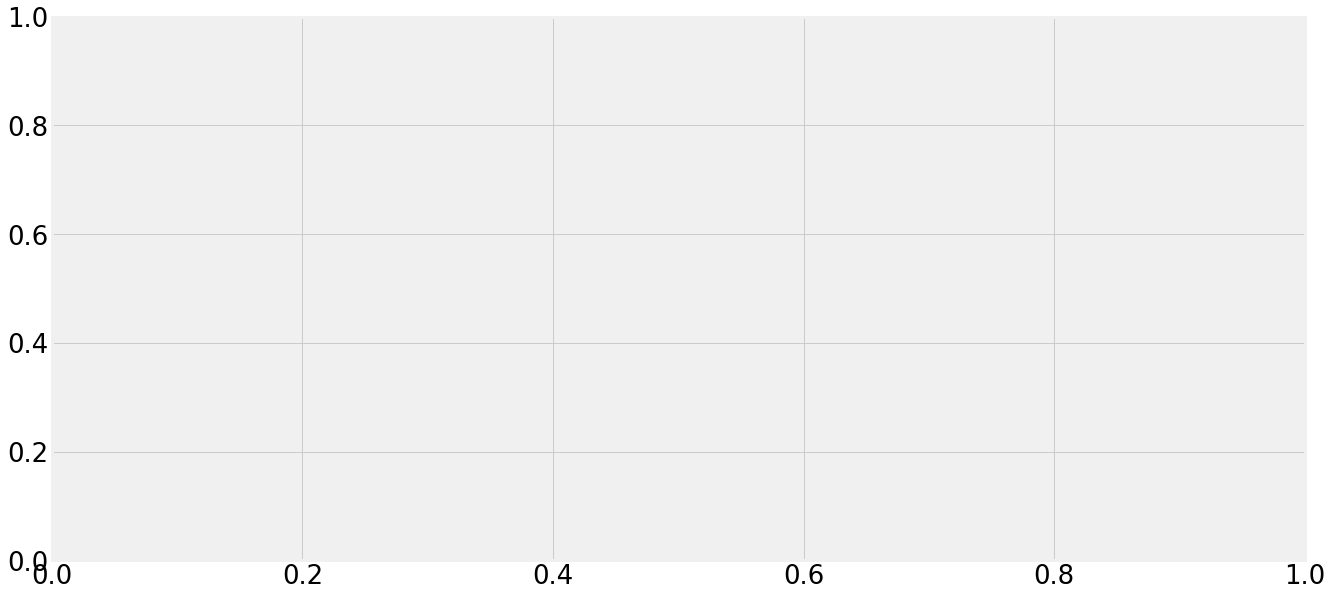

In [109]:
# Code cell 13
# Visualize fit error for each year
x = dfc.Year
width = 0.2   #size of the bar

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

p1 = ax.bar( x, errors_hist[0], width, color = 'b', label = 'Abs. error order 1 fit')
p2 = ax.bar( x + width, errors_hist[1], width, color = 'r', label = 'Abs. error order 2 fit')
p3 = ax.bar( x + 2*width, errors_hist[2], width, color = 'y', label = 'Abs. error order 3 fit')
p4 = ax.bar( x + 3*width, errors_hist[3], width, color = 'g', label = 'Abs. exponential fit')

# "Prettyfy" the bar graph
ax.set_xticks(x+2*width)
ax.set_xticklabels(x)
plt.legend(loc = 'upper left', fontsize =16)
plt.show()

#Visualise MSE for each model
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

x = np.array([0,1,2,3])
width = .6   #size of the bar

p1 = ax.bar( x[0], mse_hist[0], width, color = 'b', label = 'pred. error order 1 fit')
p2 = ax.bar( x[1], mse_hist[1], width, color = 'r', label = 'pred. error order 2 fit')
p3 = ax.bar( x[2], mse_hist[2], width, color = 'y', label = 'pred. error order 3 fit')
p4 = ax.bar( x[3], mse_hist[3], width, color = 'g', label = 'pred. exponential fit')

ax.set_xticks(x+width/2)
ax.set_xticklabels(['Poly. order 1', 'Poly. order 2', 'Poly. order 3', 'Exp. model' ], rotation=90)
plt.show()

From the last plot, it seems that a third order polynomial, while not being the true model, fits better the traffic measurements in the observed range. But how well will this model generalize outside of this range (e.g., if we want to use this to make predictions about the future Internet traffic volume) ?

## Part 8: Use Regression Model to Predict Future Values